In [3]:
install.packages("treemap")
install.packages("corrplot")

# Load libraries
library(tidyverse)
library(ggplot2)
library(scales)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
df <- read.csv("malaysia_house_price_data_2025.csv")

**Summary and Structure**


In [5]:
# View structure and summary
str(df)
summary(df)

# Count by state and property type
table(df$State)
table(df$Type)


'data.frame':	2000 obs. of  8 variables:
 $ Township    : chr  "SCIENTEX SUNGAI DUA" "BANDAR PUTRA" "TAMAN LAGENDA TROPIKA TAPAH" "SCIENTEX JASIN MUTIARA" ...
 $ Area        : chr  "Tasek Gelugor" "Kulai" "Chenderiang" "Bemban" ...
 $ State       : chr  "Penang" "Johor" "Perak" "Melaka" ...
 $ Tenure      : chr  "Freehold" "Freehold" "Freehold" "Freehold" ...
 $ Type        : chr  "Terrace House" "Cluster House, Terrace House" "Terrace House" "Terrace House" ...
 $ Median_Price: num  331800 590900 229954 255600 219300 ...
 $ Median_PSF  : num  304 322 130 218 168 328 323 126 188 496 ...
 $ Transactions: int  593 519 414 391 363 349 319 309 301 292 ...


   Township             Area              State              Tenure         
 Length:2000        Length:2000        Length:2000        Length:2000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
     Type            Median_Price        Median_PSF      Transactions   
 Length:2000        Min.   :   27049   Min.   :  38.0   Min.   : 10.00  
 Class :character   1st Qu.:  269950   1st Qu.: 201.0   1st Qu.: 12.00  
 Mode  :character   Median :  390000   Median : 293.0   Median : 16.00  
                    Mean   :  490685   Mean   : 328.9   Mean   : 28.09  
                    3rd Qu.:  573500   3rd Qu.: 412.0   3rd Qu.: 28.00  
                    Max


          Johor           Kedah        Kelantan    Kuala Lumpur          Labuan 
            377             103               3             176               1 
         Melaka Negeri Sembilan          Pahang          Penang           Perak 
             98             135              71             187             194 
         Perlis       Putrajaya           Sabah         Sarawak        Selangor 
              1               3              40              54             545 
     Terengganu 
             12 


                               Apartment 
                                     197 
                         Apartment, Flat 
                                       1 
                                Bungalow 
                                      13 
                        Bungalow, Semi D 
                                      14 
         Bungalow, Semi D, Terrace House 
                                       1 
                 Bungalow, Terrace House 
                                      21 
         Bungalow, Terrace House, Semi D 
                                       3 
                    Bungalow, Town House 
                                       1 
                           Cluster House 
                                      24 
                 Cluster House, Bungalow 
                                       1 
                   Cluster House, Semi D 
                                       6 
            Cluster House, Terrace House 
                                 

**Top States by Median Transaction Volume**

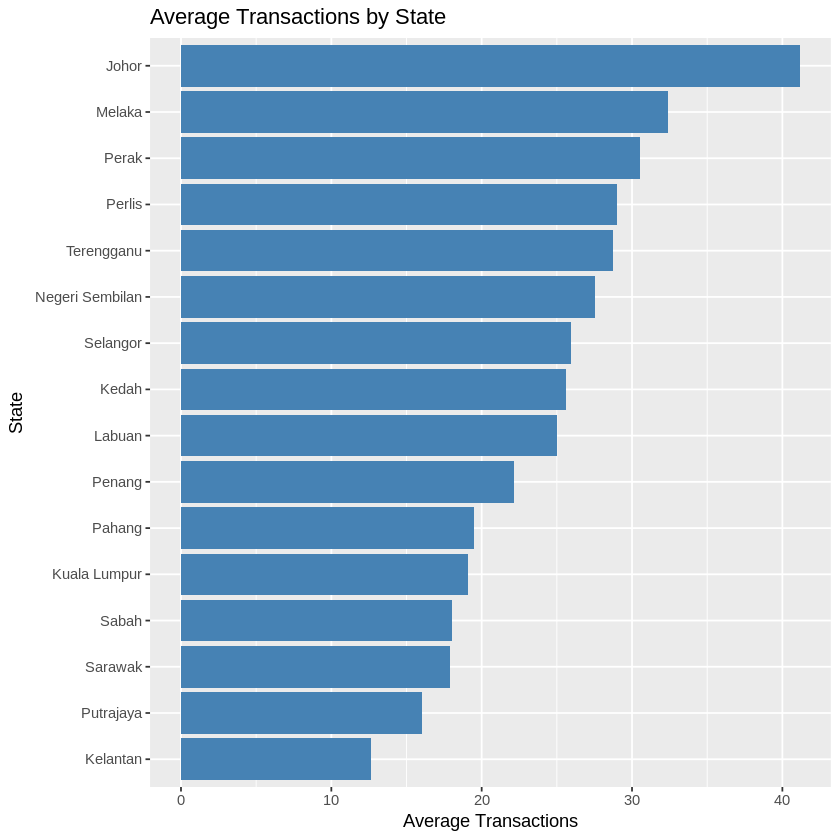

In [6]:
df %>%
  group_by(State) %>%
  summarise(Avg_Transactions = mean(Transactions)) %>%
  arrange(desc(Avg_Transactions)) %>%
  ggplot(aes(x = reorder(State, Avg_Transactions), y = Avg_Transactions)) +
  geom_col(fill = "steelblue") +
  coord_flip() +
  labs(title = "Average Transactions by State",
       x = "State", y = "Average Transactions")

**Compare Median Price per State**

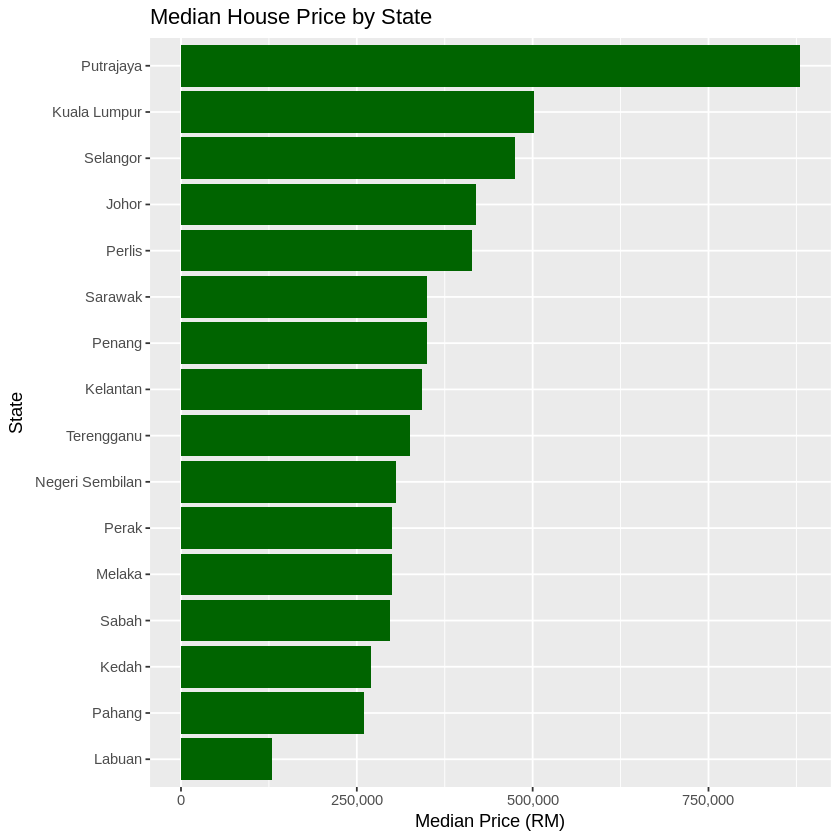

In [7]:
df %>%
  group_by(State) %>%
  summarise(Median_Price = median(Median_Price)) %>%
  ggplot(aes(x = reorder(State, Median_Price), y = Median_Price)) +
  geom_col(fill = "darkgreen") +
  coord_flip() +
  labs(title = "Median House Price by State",
       x = "State", y = "Median Price (RM)") +
  scale_y_continuous(labels = comma)


**Freehold vs Leasehold Property Prices**

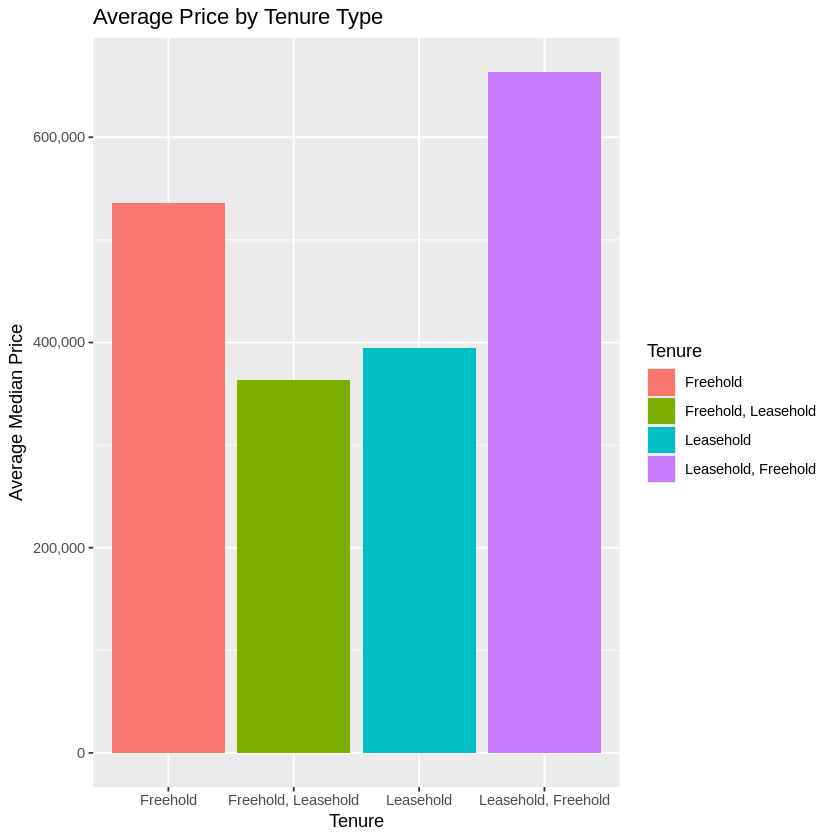

In [8]:
df %>%
  group_by(Tenure) %>%
  summarise(Avg_Price = mean(Median_Price)) %>%
  ggplot(aes(x = Tenure, y = Avg_Price, fill = Tenure)) +
  geom_bar(stat = "identity") +
  labs(title = "Average Price by Tenure Type",
       x = "Tenure", y = "Average Median Price") +
  scale_y_continuous(labels = comma)


**Identify “Affordable Hotspots”**

> Filter for areas with low price but high transaction activity (good value)



In [9]:
hotspots <- df %>%
  filter(Median_Price < 400000, Transactions > 400) %>%
  arrange(desc(Transactions))

print(hotspots[, c("Township", "State", "Median_Price", "Transactions")])


                     Township  State Median_Price Transactions
1         SCIENTEX SUNGAI DUA Penang       331800          593
2 TAMAN LAGENDA TROPIKA TAPAH  Perak       229954          414


**Price vs PSF, Size by Transactions**

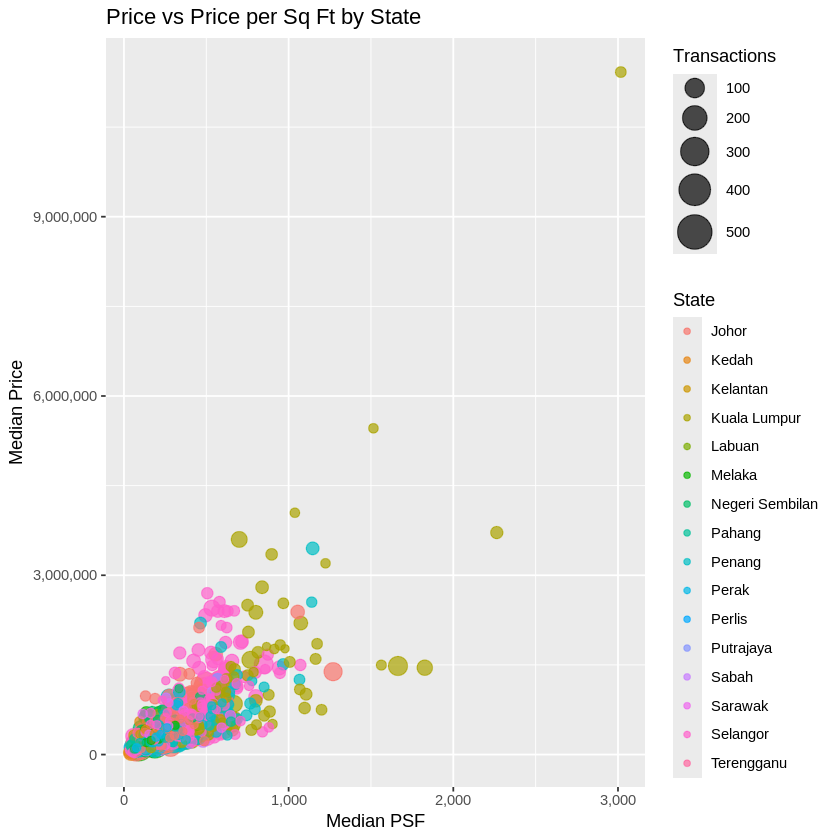

In [10]:
ggplot(df, aes(x = Median_PSF, y = Median_Price, size = Transactions, color = State)) +
  geom_point(alpha = 0.7) +
  scale_size(range = c(2, 10), name = "Transactions") +
  scale_y_continuous(labels = comma) +
  scale_x_continuous(labels = comma) +
  labs(title = "Price vs Price per Sq Ft by State",
       x = "Median PSF", y = "Median Price")


**PSF vs Median Price**


`geom_smooth()` using formula = 'y ~ x'


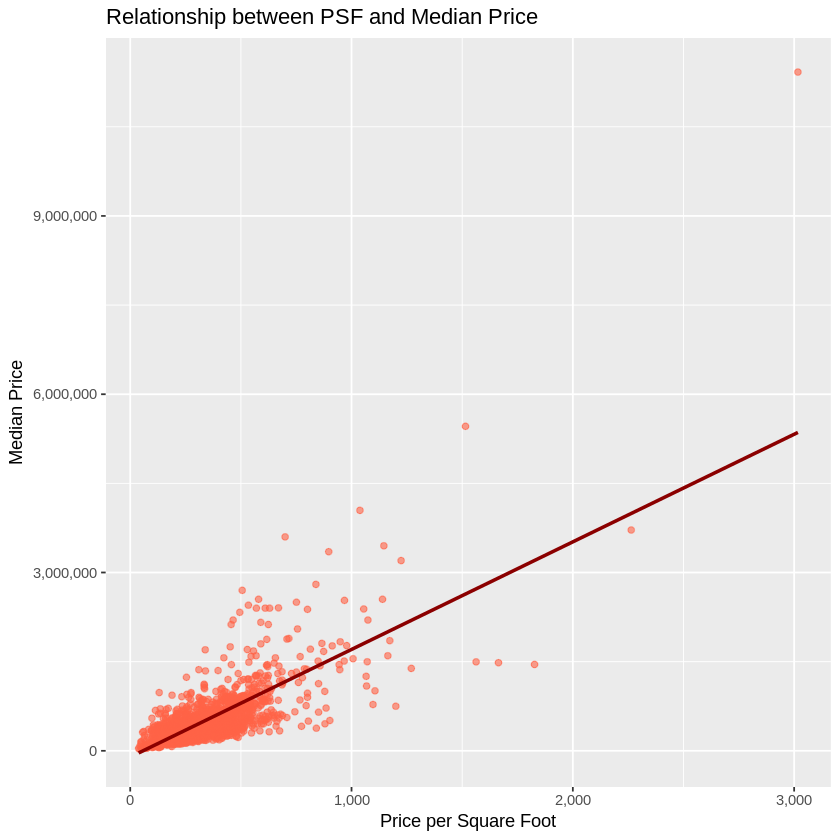

In [11]:
ggplot(df, aes(x = Median_PSF, y = Median_Price)) +
  geom_point(alpha = 0.6, color = "tomato") +
  geom_smooth(method = "lm", se = FALSE, color = "darkred") +
  labs(title = "Relationship between PSF and Median Price",
       x = "Price per Square Foot", y = "Median Price") +
  scale_x_continuous(labels = comma) +
  scale_y_continuous(labels = comma)


**Median PSF by Property Type**

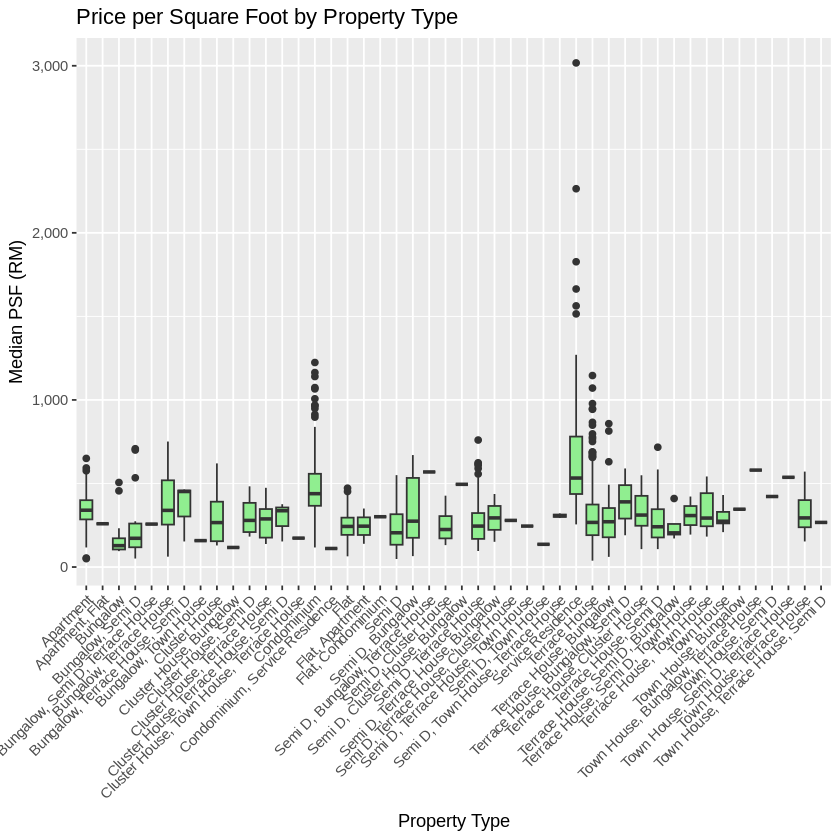

In [12]:
ggplot(df, aes(x = Type, y = Median_PSF)) +
  geom_boxplot(fill = "lightgreen") +
  labs(title = "Price per Square Foot by Property Type",
       x = "Property Type", y = "Median PSF (RM)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(labels = comma)


**PSF or Price Distribution**

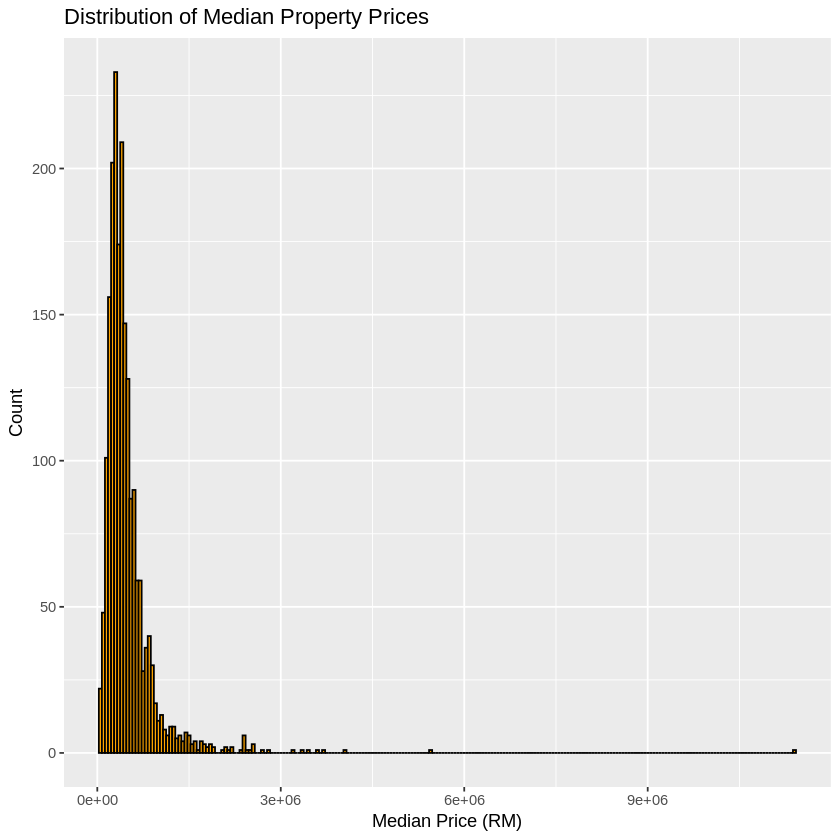

In [13]:
ggplot(df, aes(x = Median_Price)) +
  geom_histogram(binwidth = 50000, fill = "orange", color = "black") +
  labs(title = "Distribution of Median Property Prices", x = "Median Price (RM)", y = "Count")


**Choropleth Map of Median Price by State**

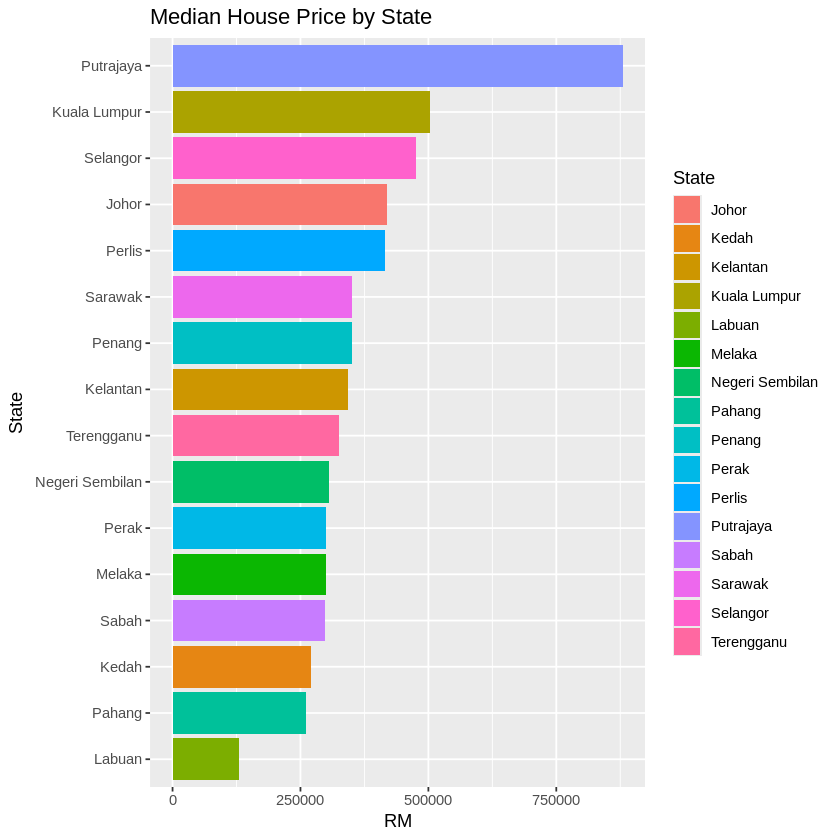

In [14]:
ggplot(df %>% group_by(State) %>% summarise(Median = median(Median_Price)),
       aes(x = reorder(State, Median), y = Median, fill = State)) +
  geom_col() +
  coord_flip() +
  labs(title = "Median House Price by State", x = "State", y = "RM")


**Correlation Heatmap**

corrplot 0.95 loaded



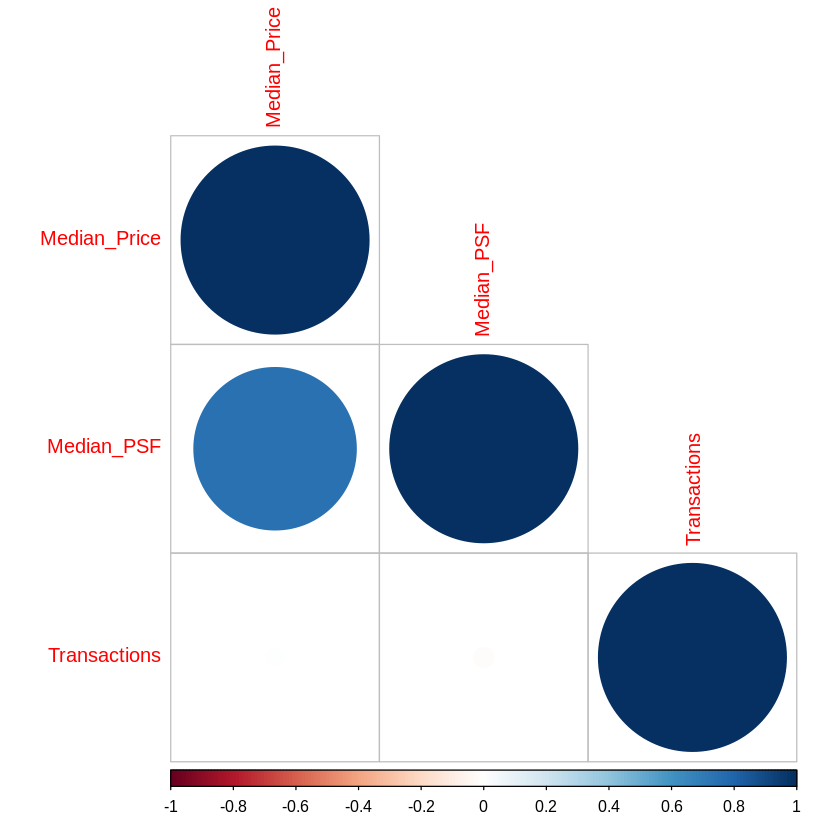

In [15]:
library(corrplot)

# Numeric-only dataframe
df_num <- df %>%
  select(Median_Price, Median_PSF, Transactions)

cor_matrix <- cor(df_num)
corrplot(cor_matrix, method = "circle", type = "lower")


**Treemap: Distribution of Transactions by Type**

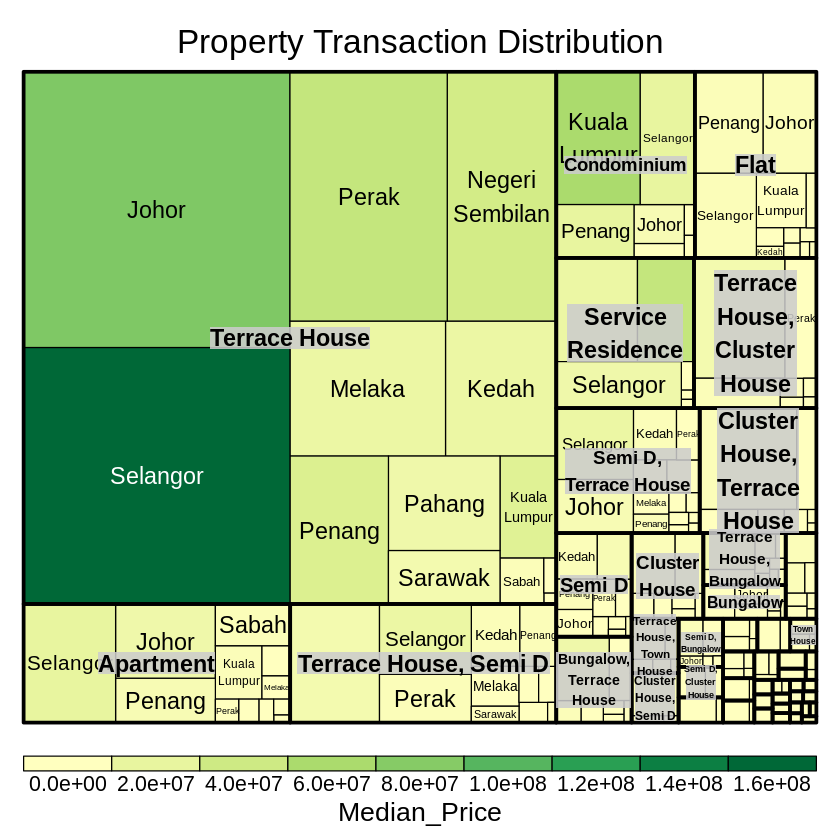

In [18]:
library(treemap)

treemap(df,
        index = c("Type", "State"),
        vSize = "Transactions",
        vColor = "Median_Price",
        type = "value",
        title = "Property Transaction Distribution",
        fontsize.labels = 14,       # Increase font size of labels inside boxes
        fontsize.title = 20,        # Increase title font size
        fontsize.legend = 16        # Increase legend font size
)
